In [1]:
# Basic python libraries
import numpy as np
import pandas as pd

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pydot as pydot

In [3]:
# Evaulation libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split    

In [4]:
# Deep learning libraries
import tensorflow as tf
import keras as keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import plot_model, to_categorical
from keras.datasets import mnist


In [5]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.15.0
Keras version: 2.15.0


In [6]:
# Load the MNIST dataset(Modified National Institute of Standards and Technology database)
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [7]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

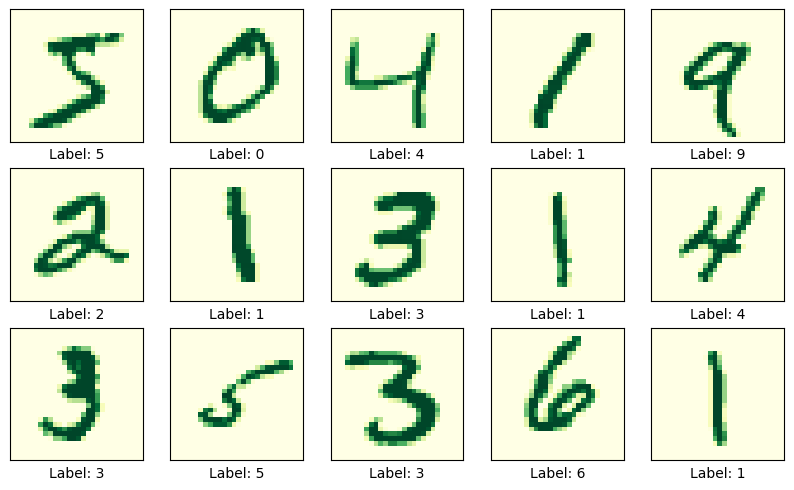

In [8]:
# Names of numbers in the data set in order
number_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

#Visualizing the digits
plt.figure(figsize=(10, 10)) # Set the figure size
for i in range(15):
    plt.subplot(5, 5, i+1) # 5 rows and 5 columns
    plt.xticks([]) # Remove x-axis ticks (horizontal)
    plt.yticks([]) # Remove y-axis ticks (vertical)
    plt.imshow(X_train_digit[i], cmap='YlGn') # Show the digit image in yellow
    #plt.title(number_names[y_train_digit[i]])
    plt.xlabel(f'Label: {y_train_digit[i]}')
    #plt.ylabel('Test')
plt.show()

In [9]:
# Explain what is X_train_digit
#70,000 total images (60K train + 10K test)
#Perfect match: Same number of images and labels
#Standard size: All images are exactly 28×28 pixels
#Ready for ML: Data is already properly formatted
# ANN expects 2D array as input, so we need to reshape the data
#Training Data:
'''
┌─────────────────┐    ┌───────────┐
│ X_train_digit   │    │y_train_   │
│ 60,000 images   │ ←→ │digit      │
│ each 28×28      │    │60,000     │
│ pixels          │    │labels     │
└─────────────────┘    │(0,1,2...9)│
                       └───────────┘

Test Data:
┌─────────────────┐    ┌───────────┐
│ X_test_digit    │    │y_test_    │
│ 10,000 images   │ ←→ │digit      │
│ each 28×28      │    │10,000     │
│ pixels          │    │labels     │
└─────────────────┘    └───────────┘ '''
X_train_digit.shape, y_train_digit.shape, X_test_digit.shape, y_test_digit.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
X_train_digit = X_train_digit.reshape((60000, 28 * 28))
X_test_digit = X_test_digit.reshape((10000, 28 * 28))

In [11]:
X_train_digit.shape #Input (Preprocess) 3D to 2D for ANN   

(60000, 784)

In [12]:
y_train_digit.shape # 1D array of labels

(60000,)

In [13]:
#Convert labels to one-hot encoding
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
#creating base neural networks
# In machin learning no brain activity. in deep learning, there is a brain activity
# This model creation is a sequential process
# Visual diagram
print("\n🎯 SEQUENTIAL MODEL FLOW:")
print("""
┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
│  INPUT      │    │  HIDDEN     │    │  HIDDEN     │    │  OUTPUT     │
│   LAYER     │───▶│   LAYER 1   │───▶│   LAYER 2   │───▶│   LAYER     │
│             │    │             │    │             │    │             │
│ 784 neurons │    │ 128 neurons │    │ 64 neurons  │    │ 10 neurons  │
│ (pixels)    │    │ (ReLU)      │    │ (ReLU)      │    │ (Sigmoid)   │
└─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘
      ↑                   ↑                   ↑                   ↑
  28×28 image        Pattern          Higher-level      Digit
  flattened to      Detection         Features        Prediction
   784 values                                         (0,1,2...9)
""")
#ReLU(-5) = 0    # Negative → Zero
#ReLU(0)  = 0    # Zero → Zero
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])


print("\n✅ Model created successfully!")
print("🎯 Architecture: 784 → 128 → 64 → 10")
print("🔄 Activations: ReLU → ReLU → Sigmoid")



🎯 SEQUENTIAL MODEL FLOW:

┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
│  INPUT      │    │  HIDDEN     │    │  HIDDEN     │    │  OUTPUT     │
│   LAYER     │───▶│   LAYER 1   │───▶│   LAYER 2   │───▶│   LAYER     │
│             │    │             │    │             │    │             │
│ 784 neurons │    │ 128 neurons │    │ 64 neurons  │    │ 10 neurons  │
│ (pixels)    │    │ (ReLU)      │    │ (ReLU)      │    │ (Sigmoid)   │
└─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘
      ↑                   ↑                   ↑                   ↑
  28×28 image        Pattern          Higher-level      Digit
  flattened to      Detection         Features        Prediction
   784 values                                         (0,1,2...9)



✅ Model created successfully!
🎯 Architecture: 784 → 128 → 64 → 10
🔄 Activations: ReLU → ReLU → Sigmoid


In [15]:
#param_number = output_channel_number * (input_channel_number +1)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222218 (868.04 KB)
Trainable params: 222218 (868.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
#Compiling the model
model.compile(loss='categorical_crossentropy', # Corrected loss function
              optimizer='adam', # Adam optimizer is widely used and effective
              metrics=['accuracy']) # Accuracy metric for evaluation
print("🚗 LEARNING TO DRIVE ANALOGY:")
print("=" * 40)
print("LOSS = 'How many mistakes did I make?'")
print("  - Hit a cone = High loss ❌")
print("  - Perfect parking = Low loss ✅")
print()
print("OPTIMIZER = 'My driving instructor'")
print("  - 'Turn the wheel more gently next time'")
print("  - 'Brake earlier when approaching a stop'")
print()
print("METRICS = 'My overall driving score'")
print("  - 'You passed 90% of your driving tests!'")
print("  - Easy to understand progress")


🚗 LEARNING TO DRIVE ANALOGY:
LOSS = 'How many mistakes did I make?'
  - Hit a cone = High loss ❌
  - Perfect parking = Low loss ✅

OPTIMIZER = 'My driving instructor'
  - 'Turn the wheel more gently next time'
  - 'Brake earlier when approaching a stop'

METRICS = 'My overall driving score'
  - 'You passed 90% of your driving tests!'
  - Easy to understand progress


In [17]:
history = model.fit(X_train_digit, y_train_digit,
                    epochs=10,
                    batch_size=100,
                    validation_data=(X_test_digit, y_test_digit))

Epoch 1/10


600/600 [==============================] - 9s 11ms/step - loss: 1.2769 - accuracy: 0.8537 - val_loss: 0.3311 - val_accuracy: 0.9223
Epoch 2/10
600/600 [==============================] - 6s 11ms/step - loss: 0.2490 - accuracy: 0.9359 - val_loss: 0.2429 - val_accuracy: 0.9363
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1681 - accuracy: 0.9534 - val_loss: 0.2351 - val_accuracy: 0.9380
Epoch 4/10
600/600 [==============================] - 6s 9ms/step - loss: 0.1328 - accuracy: 0.9621 - val_loss: 0.2046 - val_accuracy: 0.9506
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1143 - accuracy: 0.9669 - val_loss: 0.1691 - val_accuracy: 0.9592
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1066 - accuracy: 0.9707 - val_loss: 0.1775 - val_accuracy: 0.9598
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0938 - accuracy: 0.9738 - val_loss: 0.1880 - val_accuracy: 0.9550
Ep

In [20]:
#Predicting the test set results
y_predict = model.predict(X_test_digit)

313/313 [==============================] - 2s 6ms/step


In [ ]:
y_predicts = np.argmax(y_predict, axis=1) # Here we get the index of the maximum value in the encoded vector
y_digit_evaluation = np.argmax(y_test_digit, axis=1)

array([7, 1, 1, ..., 4, 5, 0], dtype=int64)